# Import all libraries required in this project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from transformers import BertTokenizer, BertModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from joblib import Parallel, delayed
import xgboost as xgb
import torch


# Data Exploration

In [2]:
data= pd.read_csv("immo_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [3]:
data.head(5)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [4]:
data.info() ## to see column types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [5]:
data.isnull().sum()  ## to see how many nulls in the data


,0
regio1,0
serviceCharge,6909
heatingType,44856
telekomTvOffer,32619
telekomHybridUploadSpeed,223830
newlyConst,0
balcony,0
picturecount,0
pricetrend,1832
telekomUploadSpeed,33358


In [6]:
data.columns # print all column names

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

In [7]:
string_columns = data.select_dtypes(include=['object']) # see which columns have strings

print(string_columns.head())

                regio1                     heatingType telekomTvOffer  \
0  Nordrhein_Westfalen                 central_heating  ONE_YEAR_FREE   
1      Rheinland_Pfalz  self_contained_central_heating  ONE_YEAR_FREE   
2              Sachsen                   floor_heating  ONE_YEAR_FREE   
3              Sachsen                district_heating  ONE_YEAR_FREE   
4               Bremen  self_contained_central_heating            NaN   

        firingTypes              geo_bln houseNumber              geo_krs  \
0               oil  Nordrhein_Westfalen         244             Dortmund   
1               gas      Rheinland_Pfalz         NaN    Rhein_Pfalz_Kreis   
2               NaN              Sachsen           4              Dresden   
3  district_heating              Sachsen          35  Mittelsachsen_Kreis   
4               gas               Bremen          10               Bremen   

        condition   interiorQual petsAllowed                       street  \
0       well_kept    

There is geographic information at muplitle levels: regio1,regio2, geo_krs,street and streetplain. We should throw out unnecssary columns as it leads to increaesed computation time. Here domain knowledge is useful. We can assume that
1. Street names should be thrown out
2. Regio1 is the whole state and rent prices are really effected by the city inside the state (regio_2 or geo_krs). Similarly geo_bln can also be dropped

In [8]:
data= data.drop(columns=['street','regio1', 'regio2',"geo_bln","houseNumber",'streetPlain'])

In [9]:
data["geo_krs"].nunique() ## are there enough unique geo_krs for ML to learn something?

419

In [10]:
data["regio3"].nunique() # are there enough regio3 for data to learn something?

8684

In [11]:
# Drop columns with more than 50% missing values

def drop_columns_with_missing_values(df, threshold=0.50):
    """
    Drops columns from a DataFrame where more than a specified percentage of values are missing.

    Parameters:
    df (pd.DataFrame): The DataFrame to process.
    threshold (float): The percentage of missing values above which columns will be dropped (default is 0.25 for 25%).

    Returns:
    pd.DataFrame: The DataFrame with columns removed where missing values exceed the threshold.
    """
    # Calculate the threshold for the number of non-missing values required
    min_non_missing = int((1 - threshold) * len(df))

    # Drop columns where the number of non-missing values is less than the calculated threshold
    df_cleaned = df.dropna(axis=1, thresh=min_non_missing)

    return df_cleaned

In [12]:
data_filtered = data.loc[data['totalRent'] != 0].reset_index(drop=True) # Totalrent should not be 0
data_filtered = data_filtered.dropna(subset=['totalRent']).reset_index(drop=True) # Totalrent should not be na
data_filtered = data_filtered.loc[data_filtered['baseRent'] != 0].reset_index(drop=True)  #baseRent should also not be 0
data_filtered = drop_columns_with_missing_values(data_filtered)


In [13]:
data_filtered.describe()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange
count,223994.000000,228041.000000,226433.000000,200028.000000,2.280410e+05,178799.000000,2.280410e+05,178799.000000,2.280410e+05,228041.000000,228041.000000,228041.000000,228041.000000,134428.000000,187725.000000,148751.000000,228041.000000,228041.000000
mean,151.446956,9.867822,3.395664,28.931005,9.023504e+02,1965.712605,1.068859e+08,3.686889,6.542317e+02,73.690853,3.750251,36508.273385,2.619564,113.899910,2.132268,3.583942,2.556146,3.042207
std,326.492143,6.442849,2.001723,16.300928,3.325959e+04,47.865032,1.251544e+07,2.730159,3.363551e+03,273.931901,2.215471,27987.430989,1.726930,59.811846,3.555548,5.890954,0.935443,1.392504
min,0.000000,0.000000,-12.330000,1.000000,1.000000e+00,1000.000000,2.887174e+07,1.000000,1.000000e+00,0.000000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000
25%,95.572500,6.000000,1.960000,10.000000,4.700000e+02,1940.000000,1.066341e+08,1.000000,3.350000e+02,54.000000,2.000000,9120.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000
50%,136.000000,9.000000,3.390000,40.000000,6.500000e+02,1972.000000,1.111408e+08,3.000000,4.900000e+02,67.000000,3.000000,37539.000000,3.000000,106.000000,2.000000,3.000000,3.000000,3.000000
75%,190.000000,13.000000,4.600000,40.000000,9.850000e+02,1996.000000,1.137653e+08,5.000000,7.955000e+02,86.000000,5.000000,56075.000000,3.000000,139.000000,3.000000,4.000000,3.000000,4.000000
max,146118.000000,112.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,9.000000,1.234567e+06,111111.000000,9.000000,99998.000000,560.000000,1983.000000,999.000000,999.000000,5.000000,7.000000


1. Above We see that minimum totalRent is 1 and maximum totalRent is huge.
2. It may help to see a distribution of Total rent and all other numeric columns. Boxplots are good to see the distribution of a column and if there are outliers.

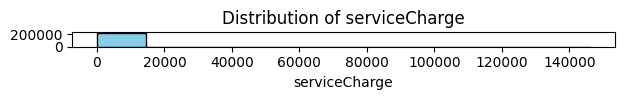

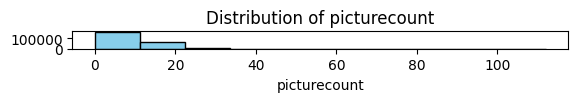

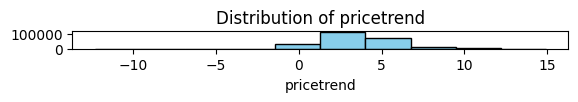

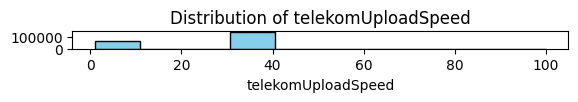

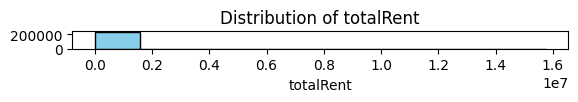

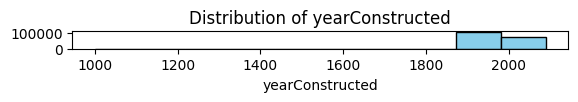

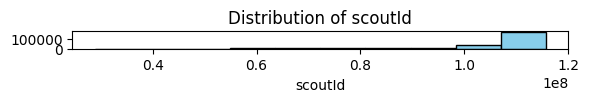

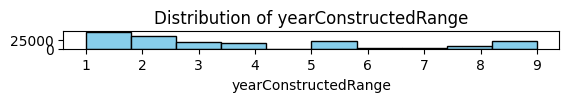

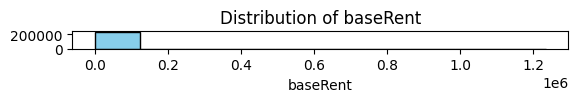

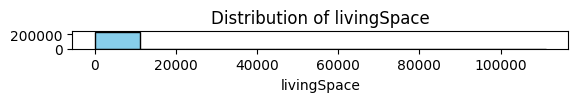

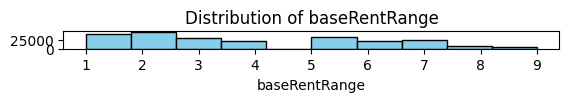

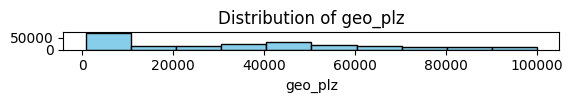

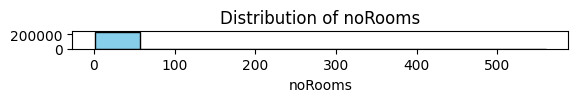

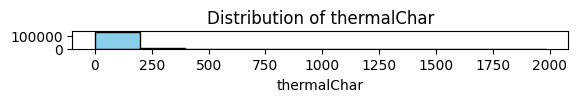

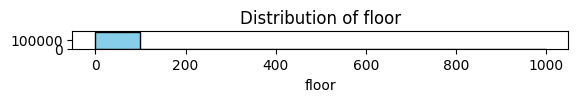

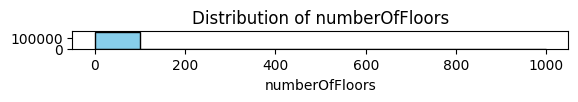

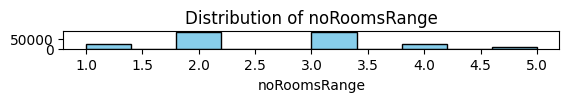

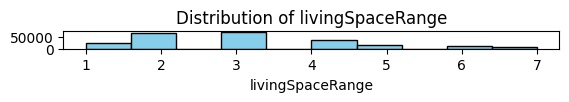

In [14]:
numeric_columns = data_filtered.select_dtypes(include=['number']).columns
plt.figure(figsize=(7, 4))

# Iterate through the numeric columns and plot their distributions
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    plt.hist(data_filtered[column],color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    # Ensure each subplot has its own x-axis limits
    plt.show()


From the above graph :
1. We have to make sure than number of floors is never 1.5, 2.5 etc. but only real numbers such as 1,2
2. Base Rent is never 0 as that is unrealistic


In [15]:
def is_valid_real_number(value):
    # Check if the value is a number (int or float)
    if isinstance(value, (int, float)) and not pd.isna(value) and not np.isinf(value):
        # Check if the value is an integer or meets specific criteria
        if value.is_integer():
            return True
    return False

# Apply the function to filter the DataFrame
data_filtered = data_filtered[data_filtered['floor'].apply(is_valid_real_number)]  # We drop rows where floor is not a real number

In [16]:
data_filtered= data_filtered.drop(columns=['scoutId','date']) # also filter out scout_id and date as those are irrelevant

{'whiskers': [<matplotlib.lines.Line2D at 0x78cde164aad0>,
 'caps': [<matplotlib.lines.Line2D at 0x78cde164b460>,
 'boxes': [<matplotlib.lines.Line2D at 0x78cde164b820>],
 'medians': [<matplotlib.lines.Line2D at 0x78cde164bb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x78cde164be80>],
 'means': []}

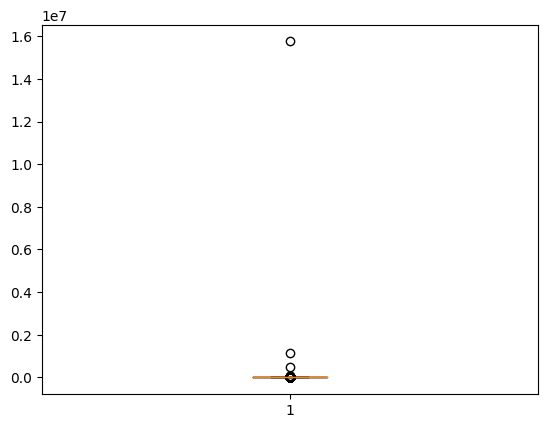

In [17]:

plt.boxplot(data_filtered["totalRent"])


### An outlier of 1e7 is really bad for the model. We need to do a proper outlier detection and throw out values that are outside 1.5 times the interquartile range

In [18]:
def remove_outliers_iqr(df, column_name):
    """
    Removes outliers from a DataFrame column based on the Interquartile Range (IQR) method.

    Parameters:
    df (pd.DataFrame): The DataFrame to process.
    column_name (str): The column from which to remove outliers.

    Returns:
    pd.DataFrame: The DataFrame with outliers removed from the specified column.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    print(Q1)
    print(Q3)
    # Calculate IQR
    IQR = Q3 - Q1

    # Determine the lower and upper bounds for outliers
    lower_bound =  (1.5 * IQR) - Q1
    print("lower bound: ", lower_bound)
    upper_bound = Q3 + (1.5 * IQR)
    print("upper bound: ", upper_bound)

    # Filter the DataFrame to keep only values within the bounds
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df_filtered

In [19]:
data_filtered = remove_outliers_iqr(data_filtered, 'totalRent')

466.0
975.44
lower bound:  298.1600000000001
upper bound:  1739.6000000000001


(array([33426., 42573., 28787., 19443., 15061., 10371.,  8077.,  6074.,
         4539.,  3471.]),
 array([ 298.22 ,  442.355,  586.49 ,  730.625,  874.76 , 1018.895,
        1163.03 , 1307.165, 1451.3  , 1595.435, 1739.57 ]),
 <BarContainer object of 10 artists>)

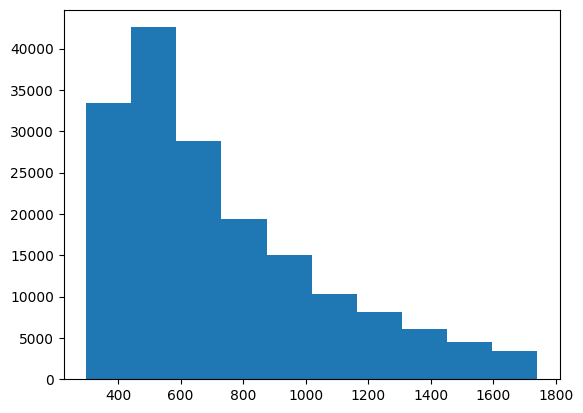

In [20]:
plt.hist(data_filtered["totalRent"])

The above distribution looks much better. One could also ormalize the above distribution , convert to log scale for eg. as that helps regression algorithms. We don't need to do that if we are using decision trees for predictions.

In [21]:
def fill_na_by_group(df, group_col):
    for col in df.columns:
        if col == group_col:  # Skip the group column itself
            continue

        if df[col].dtype == 'float64' or df[col].dtype == 'int64':
            # Numeric columns: Fill NA with the mean of the group
            df[col] = df[col].fillna(df.groupby(group_col)[col].transform('mean'))

        elif df[col].dtype == 'object':
            # String columns: Fill NA with the most frequent value (mode) of the group
            df[col] = df[col].fillna(df.groupby(group_col)[col].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

    return df

In [22]:
data_filtered = fill_na_by_group(data_filtered, group_col='geo_krs')

In [23]:
def plot_correlation_matrix(df):
    """
    Plots a correlation matrix for the numeric columns in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    """
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Compute the correlation matrix
    corr_matrix = numeric_df.corr()

    # Set the plot size
    plt.figure(figsize=(10, 8))

    # Plot the heatmap for the correlation matrix with smaller font size for annotations
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f",
                linewidths=0.5, square=True, annot_kws={"size": 6})

    # Add title and show the plot
    plt.title('Correlation Matrix of Numeric Columns', fontsize=16)
    plt.show()



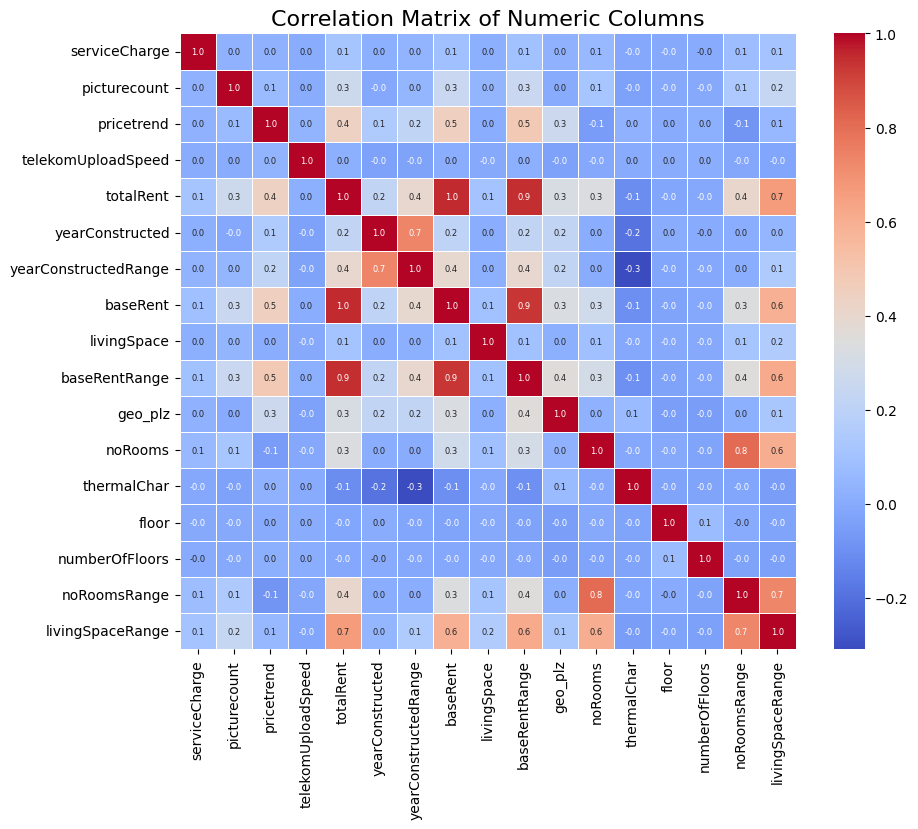

In [24]:
plot_correlation_matrix(data_filtered)

In [25]:
data_filtered['geo_plz'] = data_filtered['geo_plz'].astype(str) #Postal code should be taken as a category


we should also drop Base Rent and BaseRentRange.

In [26]:
data_filtered = data_filtered.drop(columns=['baseRent','baseRentRange'])

In [27]:
## other columns that are correlated can also be removed, as they do not give the model any extra info. for eg. YearConstructed and YearConstructedRange are quite correlated. Keeping both in the model does not make sense.

data_filtered = data_filtered.drop(columns=['yearConstructedRange','noRoomsRange','livingSpaceRange'])


## Summary of data processing steps done:
1. Columns that were dropped: scoutid, date, 'street','regio1', 'regio2',"geo_bln","houseNumber" as irrelevant columns
2. geo_plz was converted to categorical as it makes more sense that way
3. Floors cannot be 1.5, 2.5 therefore only floor values that have real numbers were kept, rest were dropped
4. All columns having more than 50% NA values were dropped
5. Rows with BaseRent containing 0 values were dropped
6. Rows with totalRent being 0 or NA values were dropped. Further outliers were dropped in totalRent based on the interquartile range (IQR)
7. Missing values in all columns were imputed taking the average of that column value per geo_krs. In case of categical columns the most frequent category within a geo_krs was taken.
8. Base Rent and Base Rent Range is dropped because it alone explains Total Range (highly correlated) while we would like to see if other factors also can help in predicting Total Rent.
9. Correlated columns cause increase in run time without giving extra information. Columns that have a high correlation among each other (0.7), one of them are dropped example yearConstructed Range is dropped as YearConstructed is there

# Task 1: Using all structured data

In [44]:
data_filtered_step1= data_filtered.drop(columns=['facilities', 'description'])


In [45]:
data_filtered_step1.describe()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,livingSpace,noRooms,thermalChar,floor,numberOfFloors
count,171822.000000,171822.000000,171822.000000,171822.000000,171822.000000,171822.000000,171822.000000,171822.000000,171822.000000,171822.000000,171822.000000
mean,143.416750,9.727864,3.318976,28.992401,729.665059,1964.292188,70.531123,2.594351,114.737775,2.101803,3.578152
std,364.316761,6.200082,1.956267,15.434227,333.544604,41.929957,164.389555,1.089213,46.112266,3.651033,5.229174
min,0.000000,0.000000,-12.330000,1.000000,298.220000,1027.000000,0.000000,1.000000,0.100000,-1.000000,0.000000
25%,98.500000,6.000000,1.920000,10.000000,470.000000,1948.000000,54.730000,2.000000,94.000000,1.000000,3.000000
50%,133.960000,9.000000,3.330000,40.000000,630.000000,1969.000000,66.000000,3.000000,111.000000,2.000000,3.274029
75%,180.000000,13.000000,4.490000,40.000000,910.000000,1990.000000,82.000000,3.000000,131.400000,3.000000,4.000000
max,146118.000000,109.000000,14.920000,100.000000,1739.570000,2029.000000,66100.000000,230.000000,1983.000000,999.000000,999.000000


In [46]:

# Define the target column
target = 'totalRent'

# Split data into features (X) and target (y)
X = data_filtered_step1.drop(columns=[target])
y = data_filtered_step1[target]

# Identify categorical (object type) and boolean columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
boolean_cols = X.select_dtypes(include=['bool']).columns.tolist()
model = xgb.XGBRegressor()

# Define a preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('bool', 'passthrough', boolean_cols)
    ],
    remainder='passthrough'
)

# Create a pipeline that first preprocesses the data, then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [50, 100],
    'regressor__max_depth': [3, 6, 9],
    'regressor__learning_rate': [0.01, 0.1],

}

# Initialize GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print(f"Best parameters found: {grid_search.best_params_}")


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 9, 'regressor__n_estimators': 100}


In [47]:
joblib.dump(grid_search, 'xgboost_step1.pkl')

['xgboost_step1.pkl']

In [48]:

best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (negative MSE): ", grid_search.best_score_)
print("Mean Squared Error on test set: ", mse)
print("R^2 Score on test set: ", r2)

Best parameters found:  {'regressor__learning_rate': 0.1, 'regressor__max_depth': 9, 'regressor__n_estimators': 100}
Best cross-validation score (negative MSE):  -13335.566706873773
Mean Squared Error on test set:  12870.567527755804
R^2 Score on test set:  0.8846767020398323


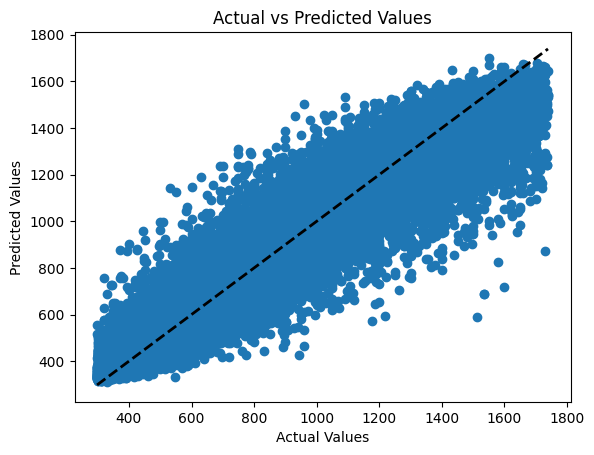

In [49]:

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.show()

We can also look at important features from the model to see what the model did

In [50]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['heatingType',
                                                   'telekomTvOffer',
                                                   'firingTypes', 'geo_krs',
                                                   'condition', 'interiorQual',
                                                   'petsAllowed', 'typeOfFlat',
                                                   'geo_plz', 'regio3']),
                                                 ('bool', 'passthrough',
                                                  ['newlyConst', 'balcony',
                                                   'hasKitchen', 'cellar',
                                                   'lift', 'garden'])...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=9, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [51]:
best_model = grid_search.best_estimator_

# Extract feature importances from the best model
feature_importances = best_model.named_steps['regressor'].feature_importances_

# Extract feature names after preprocessing
preprocessor = best_model.named_steps['preprocessor']

# Create feature names list
feature_names = []
categorical_features= best_model.named_steps['preprocessor'].transformers_[0][2]
one_hot_encoded_feature_names = []

for feature in categorical_features:
    unique_values = X_train[feature].unique()
    for value in unique_values:
        one_hot_encoded_feature_names.append(f"{feature}_{value}")


# Add names of features
feature_names= one_hot_encoded_feature_names + \
                best_model.named_steps['preprocessor'].transformers_[1][2] + \
                X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()



# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
feature_importances_df= feature_importances_df.groupby('Feature')['Importance'].sum().reset_index()
feature_importances_df['PREFIX'] = feature_importances_df['Feature'].str.extract(r'^(.*?)(?:_|$)')
merged_feature_importances_df = feature_importances_df.groupby('PREFIX', as_index=False)['Importance'].sum()


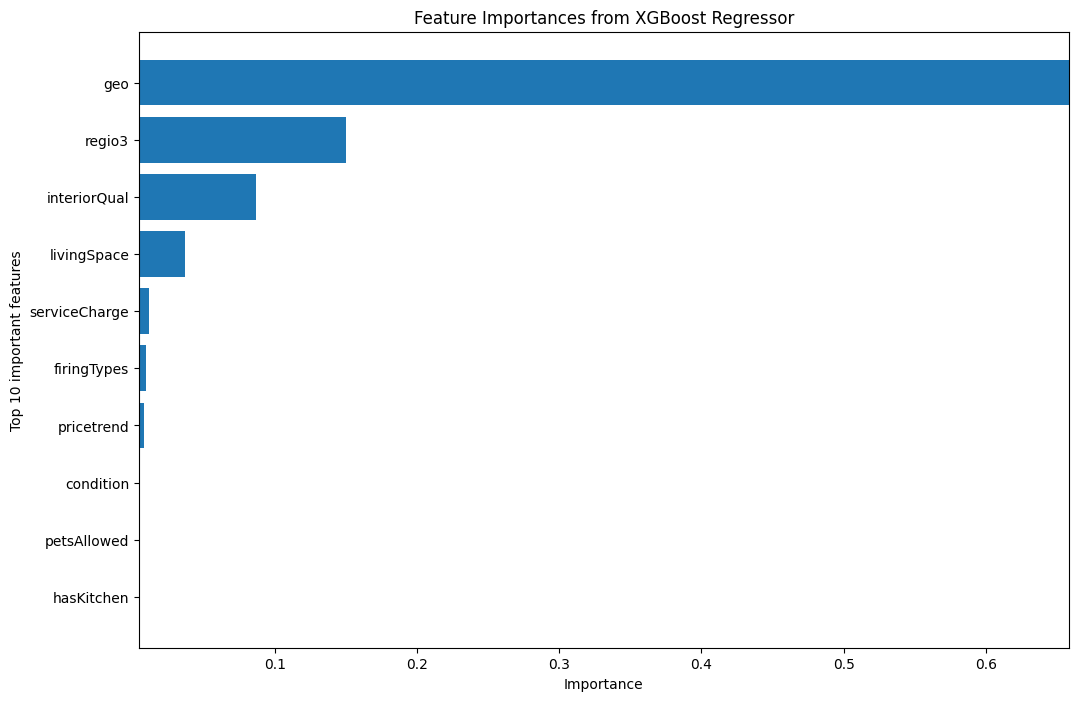

In [52]:
top_features_df = merged_feature_importances_df.nlargest(10, 'Importance')
# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(top_features_df['PREFIX'], top_features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Top 10 important features')
plt.xlim((min(top_features_df['Importance']), max(top_features_df['Importance'])))
plt.title('Feature Importances from XGBoost Regressor')
plt.gca().invert_yaxis()  # Optional: to display the most important features at the top
plt.show()

It is interesting to note that location & region of the apartment really matters, followed by the living space, service charge and other factors.

### Part 2

1. In this part we will take data_filtered which was a dataframe created at the end of part 1.
2. We will use tinyBERT to embed the facilities and decsription column.
3. The entire dataframe will then be used to predict Total rent.
4. We will not do a hyperparameter optimization and cross validation because of lack of computational resources needed to train the huge dataframe. We instead will use the best parameter settings found in step 1 to train our model on that and predict.

In [ ]:

# Load TinyBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('huawei-noah/TinyBERT_General_6L_768D')
model = BertModel.from_pretrained('huawei-noah/TinyBERT_General_6L_768D')

# Define a function to generate embeddings
def get_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True,  padding='max_length', max_length=128)
    inputs = {key: value.to(model.device) for key, value in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    # Use the mean of the token embeddings as the sentence embedding
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze()
    return embeddings.cpu().numpy()


data_filtered['facilities'] = data_filtered['facilities'].apply(get_embeddings)
data_filtered['description'] = data_filtered['description'].apply(get_embeddings)

data_filtered.to_csv('data_embedded.csv') ## save embeddings as they take a long time to compute.


In [28]:

embeded_text= pd.read_csv("data_embedded.csv",
                 lineterminator='\n')

In [30]:
embeded_text.head()

,Unnamed: 0,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,...,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,garden,regio3,description,facilities
0,0,245.0,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.000000,840.0,...,ground_floor,44269,4.0,181.400000,1.0,3.000000,True,Schüren,[-1.83775112e-01 2.21321046e-01 1.88993454e-...,[-1.68023229e-01 2.40504414e-01 1.69079110e-...
1,1,255.0,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.400000,1300.0,...,apartment,1097,3.0,96.854391,3.0,4.000000,False,Äußere_Neustadt_Antonstadt,[-1.54177189e-01 2.60422945e-01 1.57967508e-...,[-2.02427477e-01 3.33156765e-01 1.11305816e-...
2,2,138.0,self_contained_central_heating,ONE_YEAR_FREE,False,True,19,2.46,32.209406,903.0,...,apartment,28213,3.0,188.900000,1.0,3.480255,False,Neu_Schwachhausen,[-1.86551899e-01 2.07779258e-01 1.47737220e-...,[-1.92353696e-01 2.97161162e-01 6.82987720e-...
3,3,70.0,self_contained_central_heating,ONE_YEAR_FREE,False,False,9,1.01,2.400000,380.0,...,apartment,9599,2.0,119.548960,1.0,4.000000,True,Freiberg,[-1.60024434e-01 2.64716148e-01 1.61689609e-...,[-1.32080376e-01 2.57594764e-01 1.73431277e-...
4,5,110.0,oil_heating,ONE_YEAR_FREE,False,False,5,3.77,40.000000,690.0,...,roof_storey,79211,2.0,138.000000,2.0,2.000000,False,Denzlingen,[-1.71953708e-01 2.82112539e-01 1.44302726e-...,[-1.28645316e-01 1.19348854e-01 7.25995749e-...


## Neural Networks may be a superior approach to handle the embedded vectors, but to save on computational time and resources we will use XGBoost and the best set of parameters found in step 1.

In [31]:
target = 'totalRent'

# Split data into features (X) and target (y)
X = embeded_text.drop(columns=[target])
y = embeded_text[target]

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
boolean_cols = X.select_dtypes(include=['bool']).columns.tolist()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline with a scaler and XGBoost model
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('bool', 'passthrough', boolean_cols)
    ],
    remainder='passthrough'
)

# Create a pipeline that first preprocesses the data, then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', seed=42, n_estimators=100,max_depth=9,learning_rate=0.1))
])

# Train the pipeline model on the training data
pipeline.fit(X_train, y_train)

joblib.dump(pipeline, 'xgboost_step2.pkl')



['xgboost_step2.pkl']

In [32]:
pipeline= joblib.load('xgboost_step2.pkl')

y_pred = pipeline.predict(X_test)

# Evaluate the predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error on test set: ", mse)
print("R^2 Score on test set: ", r2)

Mean Squared Error on test set:  11529.07772547522
R^2 Score on test set:  0.8966967647018169


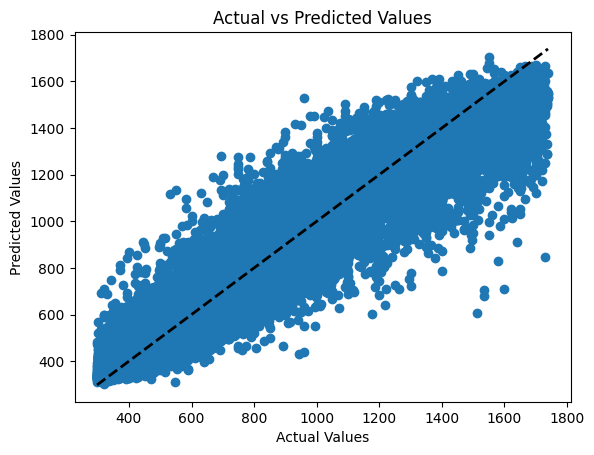

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.show()

Below we can again compute feature importances to see what the model found interesting

In [34]:

# Extract feature importances from the best model
feature_importances = pipeline.named_steps['regressor'].feature_importances_

# Extract feature names after preprocessing
preprocessor = pipeline.named_steps['preprocessor']

# Create feature names list
feature_names = []
categorical_features= pipeline.named_steps['preprocessor'].transformers_[0][2]
one_hot_encoded_feature_names = []

for feature in categorical_features:
    unique_values = X_train[feature].unique()
    for value in unique_values:
        one_hot_encoded_feature_names.append(f"{feature}_{value}")


# Add namesof all features
feature_names= one_hot_encoded_feature_names + \
                pipeline.named_steps['preprocessor'].transformers_[1][2] + \
                X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()



# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
feature_importances_df= feature_importances_df.groupby('Feature')['Importance'].sum().reset_index()
feature_importances_df['PREFIX'] = feature_importances_df['Feature'].str.extract(r'^(.*?)(?:_|$)'). ## sum the feature importances of ohe features
merged_feature_importances_df = feature_importances_df.groupby('PREFIX', as_index=False)['Importance'].sum()

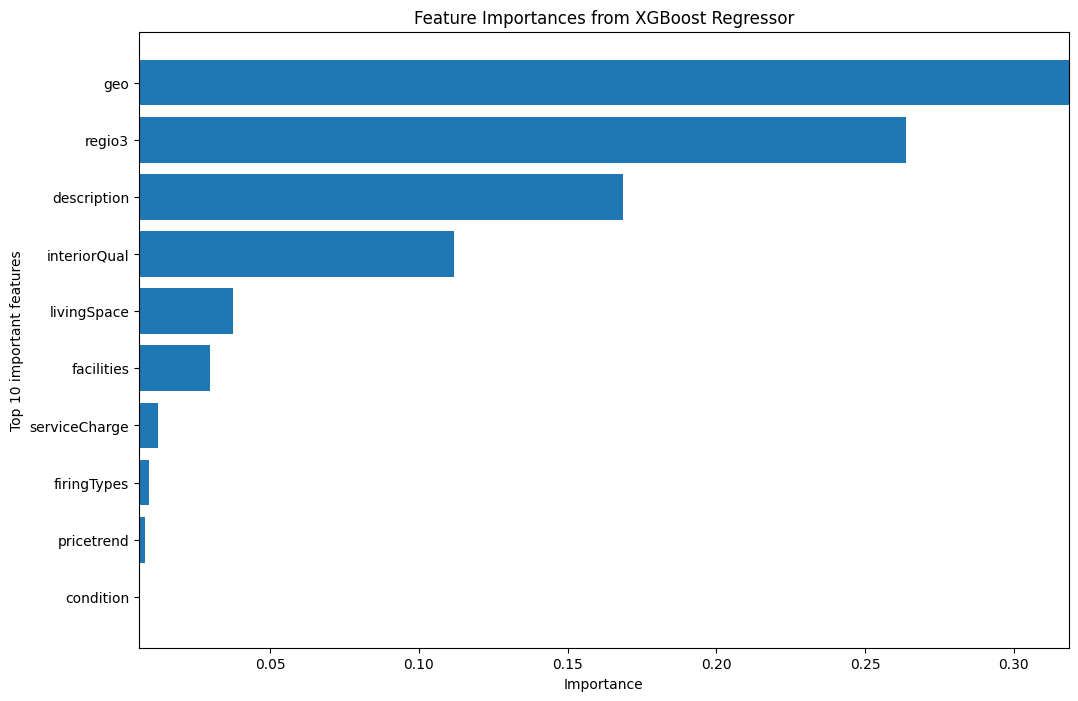

In [35]:
top_features_df = merged_feature_importances_df.nlargest(10, 'Importance')
# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(top_features_df['PREFIX'], top_features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Top 10 important features')
plt.xlim((min(top_features_df['Importance']), max(top_features_df['Importance'])))
plt.title('Feature Importances from XGBoost Regressor')
plt.gca().invert_yaxis()  # Optional: to display the most important features at the top
plt.show()

Interpreting the feature importances makes sense. Location of an apartment is important. Description of an apartment generally contains all the information required for a person, so it makes sense that it is also important.

# Conclusion:

We see that by embedding description and facilities columns in addition to the other columns we have been able to improve the predictions: both metrics mse and r2 have improved!

# Feature Processing and Model Selection:

Summary of data processing steps as explained in the notebook:
1. Columns that were dropped: scoutid, date, 'street','regio1', 'regio2',"geo_bln","houseNumber" as irrelevant columns. Domain knowledge can help in understanding which level of geographical information is most useful.
2. geo_plz was converted to categorical as it makes more sense that way
3. Floors cannot be 1.5, 2.5 therefore only floor values that have real numbers were kept, rest were dropped
4. All columns having more than 50% NA values were dropped
5. Rows with BaseRent containing 0 values were dropped
6. Rows with totalRent being 0 or NA values were dropped. Further outliers were dropped in totalRent based on the interquartile range (IQR)
7. Missing values in all columns were imputed taking the average of that column value per geo_krs. In case of categorical columns the most frequent category within a geo_krs was taken.
8. Base Rent and Base Rent Range is dropped because it alone explains Total Range (highly correlated) while we would like to see if other factors also can help in predicting Total Rent.
9. Correlated columns cause increase in run time without giving extra information. Columns that have a high correlation among each other (0.7), one of them are dropped example yearConstructed Range is dropped as YearConstructed is there

Further things that
 can be done:
1. Year of cnstruction also needs to be always real numbers. We see in the data that Year is sometimes an integer but we haven't fixed for that. Same can be thought about for the no of rooms column.



# Model Selection

Selecting the right Ml model is always done on the follwing:  
1. Type of Data: The nature of the structured data (e.g., numeric, categorical, or mixed).
2. Size of Dataset: The number of data points and features.
3. Model Performance and Interpretability: Whether interpretability is important (e.g., decision trees and linear models are more interpretable than deep learning models).
4. Computational Resources: Availability of computational power (CPU/GPU).
5. Expected Output: Whether the rent prediction is a regression problem or a classification problem (if you want to predict rent brackets, it could be classification).

6. General Guidelines for Model Selection:
Linear Models (e.g., Linear Regression):

- When to use: When relationships between features and target are assumed to be linear and dataset size is moderate to large.
- Pros: Fast, interpretable, and often performs well on structured data.
- Cons: May underperform if relationships between features are non-linear.

7. Decision Trees and Ensembles (e.g., Random Forest, XGBoost, LightGBM):

- When to use: When the relationships between features and the target are non-linear and complex. Suitable for both small and large datasets.
- Pros: Handle non-linear relationships, capture feature interactions automatically, and perform well on structured data.
- Cons: Can be interpretable (feature importances) and slower to train compared to linear models.

8. k-Nearest Neighbors (k-NN):

- When to use: When you have a small-to-medium dataset and relationships may be non-linear but are locally clustered.
- Pros: Simple to understand and implement.
- Cons: Computationally expensive on large datasets, especially during prediction.

9. Neural Networks (e.g., Multi-Layer Perceptron, Deep Learning Models):

- When to use: When the dataset is large and contains complex patterns that may not be easily captured by traditional models.
- Pros: Can capture very complex patterns and non-linear relationships.
- Cons: Requires large amounts of data, more computationally expensive, and less interpretable.

**In this project I have used Decision trees as we assume that the Total Rent can be a complex relationship between location, service charges and other factors. I used XGBoost as it is
reported to outperform other tree based methods for large datasets. Neural Networks may have been a superior model in part 2 of the project, but because of lack of computational time and resources I stuck to XGBoost**

# Model Performance Analysis:


We see that the same model : XGBoost with the same parameter setting works slightly better when text data is included in the model.
This is because usually the "description" section of a advertisement has all the information of other columns and also extra information. "facilities" also usually contain information from other columns such as "facilities" may contain any information regarding service charge or internet cost. Therefore these two features are very important as seen in the feature importance analysis.

The model can be improved in several other ways. Some of the ways are mentioned below:

# Improvement Strategies:

As baseline we have simply run an XGBoost model with a train- test split basic hyper-parameter tuning, 3 folds of cross validation. One can improve this further by:
1. More extensive hyperparamtere tuning
2. Inner and outer fold cross validation with > 3 folds.
3. Construct a naive emsemble of various models: for eg. linear models, SVM, elastic net, XGboost etc. could be run and the best model from each CV fold could be selected. The final prediction could then be an average of best ML models from each fold.
4.  tiny-BERT is creating a 128 length tensor. XGBoost doesn't "see" the tensor as a tensor in the deep learning sense. Instead, it sees it as a set of numerical features. For example, for max_length 128 it treats the tensor as 128 individual features. Neural Networks maybe a better approach as it can capture the complex, non-linear patterns in the TinyBERT embeddings.

Methods to improve Text embedding:


1. I have used TinyBERT is a smaller version of BERT, with significantly fewer parameters. This leads to smaller run times and computation resources. One could use BERT
2. I have used a max_length of 128. With 512 max_length as more context will be included.
